In [44]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn import datasets
data=datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
import pandas as pd
x=pd.DataFrame(data=data.data,columns=data.feature_names)
y=pd.Series(data=data.target)

In [46]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print(x_train.shape)
print(x_train.size)
x_train.head()

(120, 4)
480


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [50]:
print(x_test.shape)
print(x_test.size)
x_test.head()

(30, 4)
120


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [51]:
print(y_train.shape)
print(y_train.size)
y_train.head()

(120,)
120


22    0
15    0
65    1
11    0
42    0
dtype: int32

In [52]:
print(y_test.shape)
print(y_test.size)
y_test.head()

(30,)
30


73     1
18     0
118    2
78     1
76     1
dtype: int32

In [53]:
#base_models
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)

In [54]:
#blender model
from sklearn.linear_model import LogisticRegression
blender_model=LogisticRegression()

In [56]:
#blender boost model using stackingcvclassifier
stack_clf = StackingCVClassifier(classifiers=[rf_clf, et_clf, svm_clf, gb_clf],meta_classifier=blender_model,cv=5)
stack_clf

StackingCVClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                  ExtraTreesClassifier(random_state=42),
                                  SVC(kernel='linear', probability=True,
                                      random_state=42),
                                  GradientBoostingClassifier(random_state=42)],
                     cv=5, meta_classifier=LogisticRegression())

In [57]:
stack_clf.fit(x_train,y_train)

StackingCVClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                  ExtraTreesClassifier(random_state=42),
                                  SVC(kernel='linear', probability=True,
                                      random_state=42),
                                  GradientBoostingClassifier(random_state=42)],
                     cv=5, meta_classifier=LogisticRegression())

In [58]:
stack_clf.score(x_test,y_test)

1.0

In [61]:
y_pred=stack_clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
metrics.confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

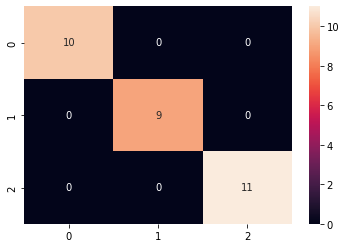

In [64]:
import seaborn as sn
cm=metrics.confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)

In [65]:
metrics.accuracy_score(y_pred,y_test)

1.0

In [67]:
metrics.precision_score(y_pred,y_test,average='macro')

1.0

In [68]:
metrics.recall_score(y_pred,y_test,average='micro')

1.0

In [69]:
metrics.f1_score(y_pred,y_test,average='macro')

1.0

In [70]:
metrics.mean_squared_error(y_pred,y_test)

0.0

In [71]:
metrics.mean_absolute_error(y_pred,y_test)

0.0

In [72]:
metrics.r2_score(y_pred,y_test)

1.0

In [73]:
#root mean square error
import math
import numpy as np
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.0

In [74]:
#Adjusted R2 score
import numpy as np
r2_score=metrics.r2_score(y_test,y_pred)
n=y_test.shape[0]
p=3
x=(1-r2_score)
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: 1.0


In [75]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(stack_clf,x_train,y_train,cv=10,scoring='accuracy')
scores

array([1.        , 1.        , 0.91666667, 1.        , 0.66666667,
       0.83333333, 1.        , 1.        , 1.        , 0.91666667])

In [76]:
scores.mean()

0.9333333333333332

In [77]:
scores.std()*2

0.2081665999466133

In [100]:
from sklearn.model_selection import GridSearchCV
params = {'meta_classifier__C': [0.1, 1, 10],'meta_classifier__solver': ['lbfgs', 'sag', 'saga']}
grid_clf=GridSearchCV(stack_clf,params,cv=5)
grid_clf.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingCVClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                                         ExtraTreesClassifier(random_state=42),
                                                         SVC(kernel='linear',
                                                             probability=True,
                                                             random_state=42),
                                                         GradientBoostingClassifier(random_state=42)],
                                            cv=5,
                                            meta_classifier=LogisticRegression()),
             param_grid={'meta_classifier__C': [0.1, 1, 10],
                         'meta_classifier__solver': ['lbfgs', 'sag', 'saga']})

In [101]:
grid_clf.best_estimator_

StackingCVClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                  ExtraTreesClassifier(random_state=42),
                                  SVC(kernel='linear', probability=True,
                                      random_state=42),
                                  GradientBoostingClassifier(random_state=42)],
                     cv=5, meta_classifier=LogisticRegression(C=1))

In [102]:
grid_clf.best_index_

3

In [103]:
grid_clf.best_params_

{'meta_classifier__C': 1, 'meta_classifier__solver': 'lbfgs'}

In [104]:
grid_clf.best_score_

0.95

In [105]:
grid_clf.cv

5

In [106]:
grid_clf.cv_results_

{'mean_fit_time': array([2.0246016 , 2.0183342 , 1.97494259, 1.96261301, 2.03694072,
        2.22392941, 2.1356286 , 2.05180316, 1.99856339]),
 'std_fit_time': array([0.05286613, 0.10066546, 0.17672046, 0.14298215, 0.14247228,
        0.20246439, 0.11485977, 0.09189353, 0.08290658]),
 'mean_score_time': array([0.026723  , 0.02105565, 0.0237154 , 0.01853442, 0.02149992,
        0.016956  , 0.02333608, 0.02093906, 0.02072268]),
 'std_score_time': array([0.00937077, 0.00636757, 0.01042352, 0.00447135, 0.00775366,
        0.00136022, 0.00919757, 0.00497261, 0.00781113]),
 'param_meta_classifier__C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_meta_classifier__solver': masked_array(data=['lbfgs', 'sag', 'saga', 'lbfgs', 'sag', 'saga',
                    'lbfgs', 'sag', 'saga'],
              mask=[False, False, False

In [107]:
data1=pd.DataFrame(grid_clf.cv_results_)
data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_meta_classifier__C,param_meta_classifier__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.024602,0.052866,0.026723,0.009371,0.1,lbfgs,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,6
1,2.018334,0.100665,0.021056,0.006368,0.1,sag,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,6
2,1.974943,0.176720,0.023715,0.010424,0.1,saga,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,6
3,1.962613,0.142982,0.018534,0.004471,1,lbfgs,"{'meta_classifier__C': 1, 'meta_classifier__so...",1.000000,0.958333,0.833333,1.000000,0.958333,0.950000,0.061237,1
4,2.036941,0.142472,0.021500,0.007754,1,sag,"{'meta_classifier__C': 1, 'meta_classifier__so...",1.000000,0.958333,0.833333,1.000000,0.958333,0.950000,0.061237,1
5,2.223929,0.202464,0.016956,0.001360,1,saga,"{'meta_classifier__C': 1, 'meta_classifier__so...",0.958333,0.958333,0.833333,1.000000,0.958333,0.941667,0.056519,6
6,2.135629,0.114860,0.023336,0.009198,10,lbfgs,"{'meta_classifier__C': 10, 'meta_classifier__s...",1.000000,0.958333,0.875000,0.958333,0.958333,0.950000,0.040825,1
7,2.051803,0.091894,0.020939,0.004973,10,sag,"{'meta_classifier__C': 10, 'meta_classifier__s...",1.000000,0.958333,0.875000,0.958333,0.958333,0.950000,0.040825,1
8,1.998563,0.082907,0.020723,0.007811,10,saga,"{'meta_classifier__C': 10, 'meta_classifier__s...",1.000000,0.958333,0.875000,0.958333,0.958333,0.950000,0.040825,1


In [108]:
data1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_meta_classifier__C,param_meta_classifier__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.024602,0.052866,0.026723,0.009371,0.1,lbfgs,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,6
1,2.018334,0.100665,0.021056,0.006368,0.1,sag,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,6
2,1.974943,0.176720,0.023715,0.010424,0.1,saga,"{'meta_classifier__C': 0.1, 'meta_classifier__...",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,6
3,1.962613,0.142982,0.018534,0.004471,1,lbfgs,"{'meta_classifier__C': 1, 'meta_classifier__so...",1.000000,0.958333,0.833333,1.0,0.958333,0.950000,0.061237,1
4,2.036941,0.142472,0.021500,0.007754,1,sag,"{'meta_classifier__C': 1, 'meta_classifier__so...",1.000000,0.958333,0.833333,1.0,0.958333,0.950000,0.061237,1
